In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

listings = pd.read_excel('data/stock_data/listings.xlsx', sheet_name='nyse', na_values='n/a')

/Users/nyashamasamba/anaconda3/envs/rules_vs_random/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
listings

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing"
4,AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines
...,...,...,...,...,...,...,...
3142,ZB^H,Zions Bancorporation,25.30,0.000000e+00,NaN,NaN,NaN
3143,ZBK,Zions Bancorporation,28.86,0.000000e+00,NaN,Finance,Major Banks
3144,ZOES,"Zoe&#39;s Kitchen, Inc.",17.07,3.325561e+08,2014.0,Consumer Services,Restaurants
3145,ZTS,Zoetis Inc.,53.10,2.610544e+10,2013.0,Health Care,Major Pharmaceuticals


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


In [5]:

# The index is currently a RangeIndex
# Make the Stock Symbol column the index
listings.set_index('Stock Symbol', inplace=True)
listings.head()

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software
MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments
WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing"
AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines


In [6]:

# Drop rows with missing sector data
listings.dropna(subset=['Sector'], inplace=True)

In [7]:

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year'] < 2019]
listings.head()

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing"
ATEN,"A10 Networks, Inc.",8.72,5.959822e+08,2014.0,Technology,Computer Communications Equipment
AAC,"AAC Holdings, Inc.",8.08,1.914187e+08,2014.0,Health Care,Medical Specialities
ABBV,AbbVie Inc.,64.13,1.021961e+11,2012.0,Health Care,Major Pharmaceuticals


In [8]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, WBAI to ZTO
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           967 non-null    object 
 1   Last Sale              967 non-null    float64
 2   Market Capitalization  967 non-null    float64
 3   IPO Year               967 non-null    float64
 4   Sector                 967 non-null    object 
 5   Industry               967 non-null    object 
dtypes: float64(3), object(3)
memory usage: 52.9+ KB


In [9]:

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))

Sector
Consumer Services        240
Finance                  132
Energy                   113
Technology               108
Public Utilities          76
Basic Industries          66
Capital Goods             61
Consumer Non-Durables     47
Health Care               43
Transportation            37
Miscellaneous             25
Consumer Durables         19
dtype: int64


In [10]:

# Select largest company for each sector
# These will make up our sector market-cap-weighted index
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)
print(components.sort_values(ascending=False)) # sorted by market cap

Sector                 Stock Symbol
Miscellaneous          BABA            2.755250e+11
Technology             ORCL            1.810461e+11
Health Care            ABBV            1.021961e+11
Transportation         UPS             9.018089e+10
Finance                GS              8.884059e+10
Consumer Non-Durables  ABEV            8.824020e+10
Basic Industries       RIO             7.043148e+10
Public Utilities       TEF             5.460981e+10
Capital Goods          GM              5.008634e+10
Consumer Services      LVS             4.438430e+10
Energy                 PAA             2.222300e+10
Consumer Durables      WRK             1.235490e+10
Name: Market Capitalization, dtype: float64


In [11]:

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

Index(['RIO', 'GM', 'WRK', 'ABEV', 'LVS', 'PAA', 'GS', 'ABBV', 'BABA', 'TEF',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')


In [12]:

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

                                    Company Name  Market Capitalization  \
Stock Symbol                                                              
BABA               Alibaba Group Holding Limited           2.755250e+11   
ORCL                          Oracle Corporation           1.810461e+11   
ABBV                                 AbbVie Inc.           1.021961e+11   
UPS                  United Parcel Service, Inc.           9.018089e+10   
GS               Goldman Sachs Group, Inc. (The)           8.884059e+10   
ABEV                                  Ambev S.A.           8.824020e+10   
RIO                                Rio Tinto Plc           7.043148e+10   
TEF                                Telefonica SA           5.460981e+10   
GM                        General Motors Company           5.008634e+10   
LVS                        Las Vegas Sands Corp.           4.438430e+10   
PAA           Plains All American Pipeline, L.P.           2.222300e+10   
WRK                      

In [13]:

# We'll need current prices to calculate returns for the companies in our index
stock_prices = pd.read_csv('data/stock_data/market_cap_series.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.head())

                   AAPL          AMGN          AMZN         CPRT           EL  \
Date                                                                            
2010-01-04  160386.7278  42475.580670  63893.145750  2090.225938  8892.669154   
2010-01-05  160701.5202  42107.635585  64270.110538  2090.225938  8859.692631   
2010-01-06  158130.7156  41791.202811  63105.814231  2081.038131  8885.341038   
2010-01-07  157815.9232  41408.539922  62032.180340  2067.256422  8998.926841   
2010-01-08  158865.2312  41776.485008  63711.820915  2076.444228  9035.567423   

                      GS      ILMN            MA           PAA            RIO  \
Date                                                                            
2010-01-04  68854.242342  4469.465  28476.143688  19531.934838  101342.466626   
2010-01-05  70071.563705  4440.205  28398.521801  19748.956336  102916.051241   
2010-01-06  69323.666920  4713.786  28343.077596  19741.722286  106063.220471   
2010-01-07  70680.224387  4

In [14]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB


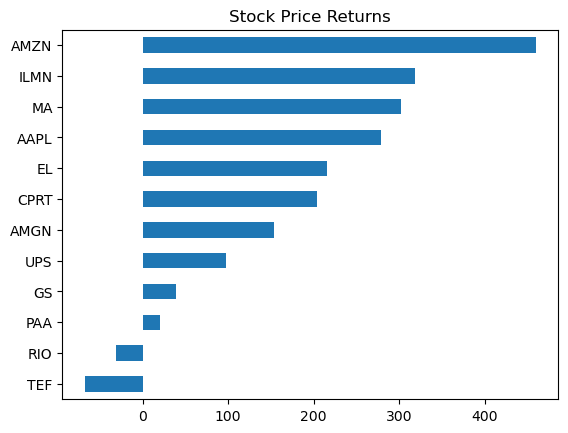

In [15]:

# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')
plt.show()